<a href="https://colab.research.google.com/github/Shanks1228/SteelDefectDetection/blob/master/Metal_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *

In [0]:
from fastai.vision import *

In [0]:
from fastai.metrics import error_rate

In [0]:
import pandas as pd
import numpy as np

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [0]:
path = 'train_images/'

In [0]:
bs = 64

In [0]:
train_df[train_df['ClassId'] != 1] = 'Defect'
train_df[train_df['ClassId'] == 1] = 'No Defect'

In [0]:
no_defects_index = train_df[train_df['ClassId'] == 'No Defect'].index
defects_index = train_df[train_df['ClassId'] == 'Defect'].index

In [0]:
train_df_stratified = train_df.iloc[np.concatenate([defects_index_random, no_defects_index]),:]

In [0]:
train_df_stratified.head()

,ImageId,ClassId,EncodedPixels
6440,Defect,Defect,Defect
6395,Defect,Defect,Defect
3784,Defect,Defect,Defect
517,Defect,Defect,Defect
6182,Defect,Defect,Defect


In [0]:
print(pd.DataFrame({'NB':train_df_stratified.groupby(['ClassId']).size()}).reset_index())

     ClassId   NB
0     Defect  897
1  No Defect  897


In [0]:
train_df_stratified.shape

(1794, 3)

In [0]:
fn_paths = [path+name for name in train_df_stratified['ImageId']]

In [0]:
print(len(no_defects_index), '\n', len(defects_index))

In [0]:
defects_index_random = np.random.choice(defects_index, len(no_defects_index))

In [0]:
labels = list(train_df_stratified['ClassId'])

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

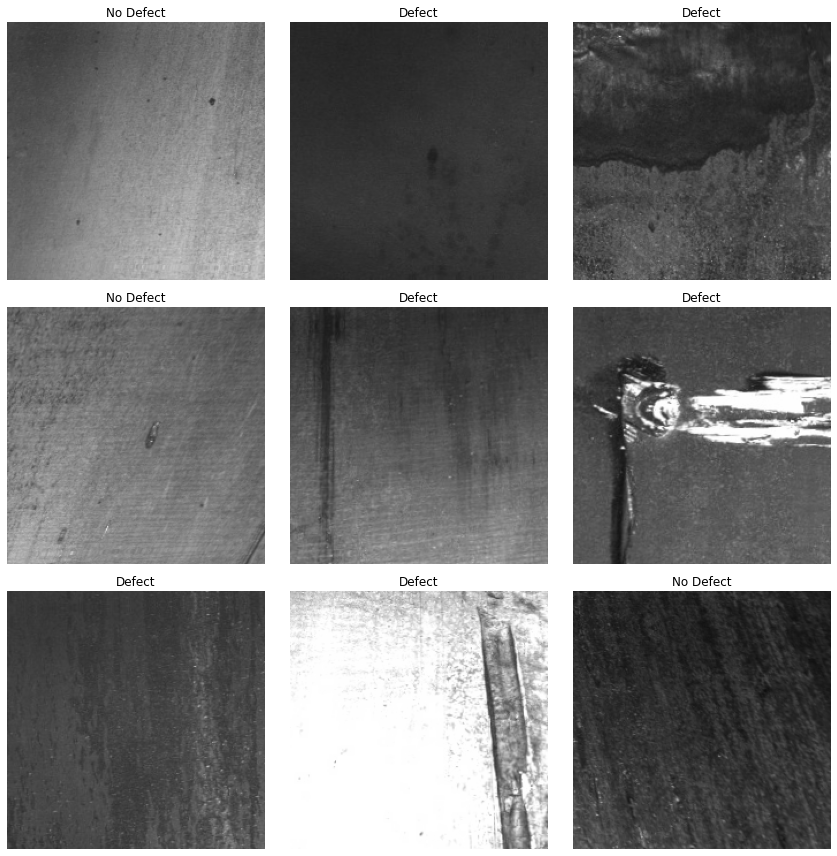

In [0]:
data.show_batch(rows=3, figure=(7,6))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Defect', 'No Defect'], 2, 1436, 358)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.670226,0.406912,0.189944,00:55
1,0.659774,0.448276,0.198324,00:56
2,0.617598,0.444478,0.189944,00:55
3,0.603081,0.426354,0.192737,00:54


In [0]:
learn.path

PosixPath('/content')

In [0]:
learn.path = Path('/content/')

In [0]:
learn.export('steel_model.pkl')

In [0]:
learn.save('stage-1');

In [0]:
learn.unfreeze()

In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


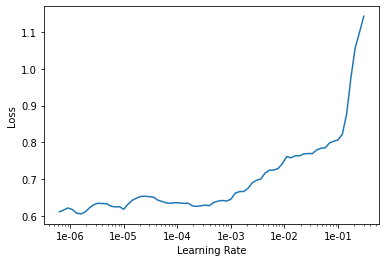

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [0]:
learn.save('stage-2')

In [0]:
import torch
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(learn.state_dict(), path)